# Linear and Multiple Regression exercises

We will apply linear regression on a new dataset which is about concrete. The dataset source opinions, concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate. We will fit a simple linear model for the response variable concrete compressive strength and extend it to multiple predictors to analyze and evaluate any improvement in the model.

In [2]:
concrete_data = read.csv("datasets/Concrete_Data.csv",
                         header=TRUE)

t(head(concrete_data))

,1,2,3,4,5,6
Cement..component.1..kg.in.a.m.3.mixture.,540.00,540.00,332.50,332.50,198.6,266.00
Blast.Furnace.Slag..component.2..kg.in.a.m.3.mixture.,0.00,0.00,142.50,142.50,132.4,114.00
Fly.Ash..component.3..kg.in.a.m.3.mixture.,0.00,0.00,0.00,0.00,0.0,0.00
Water...component.4..kg.in.a.m.3.mixture.,162.00,162.00,228.00,228.00,192.0,228.00
Superplasticizer..component.5..kg.in.a.m.3.mixture.,2.50,2.50,0.00,0.00,0.0,0.00
Coarse.Aggregate...component.6..kg.in.a.m.3.mixture.,1040.00,1055.00,932.00,932.00,978.4,932.00
Fine.Aggregate..component.7..kg.in.a.m.3.mixture.,676.00,676.00,594.00,594.00,825.5,670.00
Age..day.,28.00,28.00,270.00,365.00,360.0,90.00
Concrete.compressive.strength.MPa..megapascals..,79.99,61.89,40.27,41.05,44.3,47.03


In [4]:
library(stringr)

h <- read.csv("datasets/headers.txt", sep = "\n", header = FALSE)

cols <- str_split_fixed(h$V1, " ", 2)
headers = cols[0:9]
names(concrete_data) <- headers
head(concrete_data)

Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Concrete
540.0,0.0,0,162,2.5,1040.0,676.0,28,79.99
540.0,0.0,0,162,2.5,1055.0,676.0,28,61.89
332.5,142.5,0,228,0.0,932.0,594.0,270,40.27
332.5,142.5,0,228,0.0,932.0,594.0,365,41.05
198.6,132.4,0,192,0.0,978.4,825.5,360,44.30
266.0,114.0,0,228,0.0,932.0,670.0,90,47.03


In [5]:
library(caTools)
set.seed(1000) # set.seed() will help us to reproduce the results.


split <- sample.split(concrete_data$Concrete, 
                     SplitRatio = 0.70)

# Train data will have 70% of data
train_data  <- subset(concrete_data, split == TRUE)

# Test data will have the rest 30% of data
test_data <- subset(concrete_data, split == FALSE)

In [6]:
dim(train_data)

[1] 721   9

In [7]:
dim(test_data)

[1] 309   9

In [8]:
cor(train_data)

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Concrete
Cement,1.00000000,-0.26450684,-0.404872562,-0.09100654,0.1056472,-0.125184235,-0.20881391,0.06162377,0.5113358
Blast,-0.26450684,1.00000000,-0.332889393,0.12028319,0.0442492,-0.294079870,-0.29749125,-0.05270709,0.1044302
Fly,-0.40487256,-0.33288939,1.000000000,-0.27390833,0.3770744,0.003019973,0.09064543,-0.14991558,-0.1140063
Water,-0.09100654,0.12028319,-0.273908331,1.00000000,-0.6376211,-0.178689670,-0.44383214,0.29158177,-0.2678382
Superplasticizer,0.10564721,0.04424920,0.377074412,-0.63762114,1.0000000,-0.276017172,0.18869564,-0.20726499,0.3465863
Coarse,-0.12518424,-0.29407987,0.003019973,-0.17868967,-0.2760172,1.000000000,-0.16567141,0.01356077,-0.1739224
Fine,-0.20881391,-0.29749125,0.090645433,-0.44383214,0.1886956,-0.165671411,1.00000000,-0.13718906,-0.1528466
Age,0.06162377,-0.05270709,-0.149915576,0.29158177,-0.2072650,0.013560773,-0.13718906,1.00000000,0.3260410
Concrete,0.51133578,0.10443017,-0.114006273,-0.26783820,0.3465863,-0.173922425,-0.15284656,0.32604104,1.0000000


cement is highly correlated with concrete with a correlation of 0.51. 

In [9]:
concrete_cement_reg <- lm(Concrete ~ Cement, data = train_data)
summary(concrete_cement_reg)


Call:
lm(formula = Concrete ~ Cement, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.978 -10.986  -0.686   9.625  43.169 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.080594   1.508800    8.67   <2e-16 ***
Cement       0.080955   0.005074   15.96   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.1 on 719 degrees of freedom
Multiple R-squared:  0.2615,	Adjusted R-squared:  0.2604 
F-statistic: 254.5 on 1 and 719 DF,  p-value: < 2.2e-16


In [12]:
# The predicted values for dependent variable 'Concrete' 
# can be accessed by referring to fitted.values of the model
pred_values <- concrete_cement_reg$fitted.values
pred_values[0:10]

1        3        4        5        6        8        9       10 
56.79622 39.99809 39.99809 29.15823 34.61459 43.84344 34.61459 51.53415 
      11       13 
29.15823 47.68880

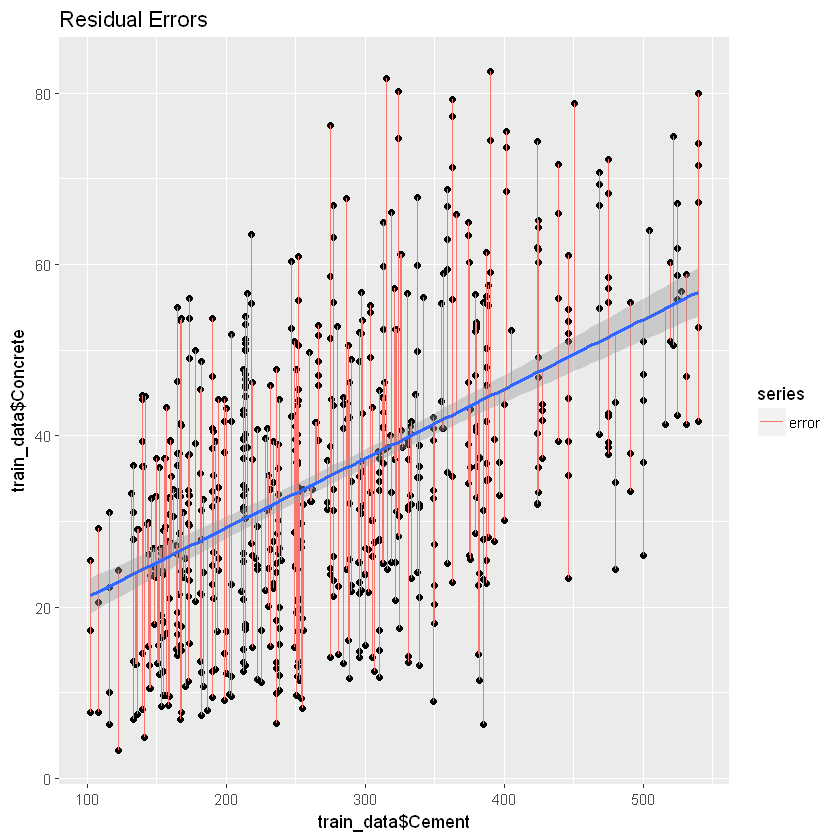

In [13]:
library(ggplot2)

#plot the regression line and residual errors
qplot(x = train_data$Cement, y = train_data$Concrete) + 
    geom_segment(aes(x = train_data$Cement, xend = train_data$Cement, 
                        y = train_data$Concrete, yend = pred_values,
                        color = "error")) + 

    geom_smooth(method = lm, level = 0.95) + 
    labs(title = "Residual Errors", color = "series")

In [14]:
res <- concrete_cement_reg$residuals
SSE <- sum(res^2)
print(SSE)

[1] 142961.3


In [15]:
concrete_reg1 <- lm(Concrete ~ Cement + Superplasticizer, data = train_data)
summary(concrete_reg1)


Call:
lm(formula = Concrete ~ Cement + Superplasticizer, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.302 -10.158  -0.310   8.888  43.682 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.310078   1.470237   6.332 4.26e-10 ***
Cement           0.076006   0.004798  15.842  < 2e-16 ***
Superplasticizer 0.816350   0.083612   9.764  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.26 on 718 degrees of freedom
Multiple R-squared:  0.348,	Adjusted R-squared:  0.3462 
F-statistic: 191.6 on 2 and 718 DF,  p-value: < 2.2e-16


In [16]:
concrete_reg2 <- lm(Concrete ~ Cement + Superplasticizer + Age, 
                       data = train_data)

summary(concrete_reg2)


Call:
lm(formula = Concrete ~ Cement + Superplasticizer + Age, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.810  -7.861  -0.418   7.101  45.662 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.918025   1.349266   3.645 0.000287 ***
Cement           0.070970   0.004292  16.535  < 2e-16 ***
Superplasticizer 1.041002   0.076316  13.641  < 2e-16 ***
Age              0.095443   0.006983  13.667  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.82 on 717 degrees of freedom
Multiple R-squared:  0.4828,	Adjusted R-squared:  0.4806 
F-statistic: 223.1 on 3 and 717 DF,  p-value: < 2.2e-16


The model is getting better with addition of new predictors. The latest model concrete_reg2 can explain more variation in the data. If we keep on adding the data at some point there would be an insignificant increase in the model R-squared value. Its better to exclude variables to avoid over fitting of models. The variables Coarse, Fine, Fly don't contribute much to the model to the model built with Cement+Superplasticizer+Age+Blast+Water as predictos.
We had to check each variable if it was adding any new information to the model. This can become time consuming when there are few 10's of variables in the model. Instead you can reverse engineer and build a model using all the independent variables and start selecting the variables which are significant or exclude variables that are insignificant which ever works the best in a situation.

In [17]:
concrete_reg3 <- lm(Concrete ~ ., 
                    data = train_data)

summary(concrete_reg3)


Call:
lm(formula = Concrete ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.053  -6.049   0.573   6.469  35.667 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -29.526293  32.214828  -0.917   0.3597    
Cement             0.121542   0.010309  11.789  < 2e-16 ***
Blast              0.098370   0.012217   8.052 3.43e-15 ***
Fly                0.087236   0.015213   5.734 1.45e-08 ***
Water             -0.130040   0.049200  -2.643   0.0084 ** 
Superplasticizer   0.282243   0.110210   2.561   0.0106 *  
Coarse             0.017989   0.011325   1.588   0.1126    
Fine               0.023600   0.012889   1.831   0.0675 .  
Age                0.111706   0.006368  17.542  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.44 on 712 degrees of freedom
Multiple R-squared:  0.5991,	Adjusted R-squared:  0.5946 
F-statistic:   133 on 8 and 712 DF,  p-value: < 2.2e-16

In [18]:
concrete_reg4 <- lm(Concrete ~ Cement + Blast + Fly + Water + Superplasticizer + Age,
                   data = train_data)

summary(concrete_reg4)


Call:
lm(formula = Concrete ~ Cement + Blast + Fly + Water + Superplasticizer + 
    Age, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.134  -6.255   0.653   6.432  35.647 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      27.326967   5.116918   5.341 1.25e-07 ***
Cement            0.105275   0.005217  20.181  < 2e-16 ***
Blast             0.078978   0.006020  13.119  < 2e-16 ***
Fly               0.065353   0.009442   6.922 9.94e-12 ***
Water            -0.205056   0.025496  -8.043 3.66e-15 ***
Superplasticizer  0.239313   0.100128   2.390   0.0171 *  
Age               0.111282   0.006361  17.494  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.45 on 714 degrees of freedom
Multiple R-squared:  0.5972,	Adjusted R-squared:  0.5938 
F-statistic: 176.4 on 6 and 714 DF,  p-value: < 2.2e-16


The R-squared value of above model concrete_reg4 is 0.59. This is the best model you can get without applying any more advanced techniques. You came to this point in two steps doing reverse engineering eliminating variables from the model. Above approach of including predictors one by one and checking R-squared value will make build eight different models adding eight variables to model one by one. So this second approach is the better one. This may not be the case in all situations but its a better approach when your data has amny predictos.